<a href="https://colab.research.google.com/github/benjacd/t2_mineria/blob/main/CTallerMineria2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy import stats
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importando el DataSet
pd.set_option('display.max_columns', None)
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Taller 2/houses_to_rent_v2.csv', sep = ",")

In [ ]:
df.info()
#Variables importantes
#Variables independientes = city, area, rooms, bathroom, parking spaces, floor, animal, furniture
#Variables dependientes = hoa, rent amount, property tax, fire insurence, total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [ ]:
df.groupby(['floor']).count()

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
floor,,,,,,,,,,,,
-,2461,2461,2461,2461,2461,2461,2461,2461,2461,2461,2461,2461
1,1081,1081,1081,1081,1081,1081,1081,1081,1081,1081,1081,1081
10,357,357,357,357,357,357,357,357,357,357,357,357
11,303,303,303,303,303,303,303,303,303,303,303,303
12,257,257,257,257,257,257,257,257,257,257,257,257
13,200,200,200,200,200,200,200,200,200,200,200,200
14,170,170,170,170,170,170,170,170,170,170,170,170
15,147,147,147,147,147,147,147,147,147,147,147,147
16,109,109,109,109,109,109,109,109,109,109,109,109


(array([1.0691e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0.,  31370.,  62740.,  94110., 125480., 156850., 188220.,
        219590., 250960., 282330., 313700.]),
 <a list of 10 Patch objects>)

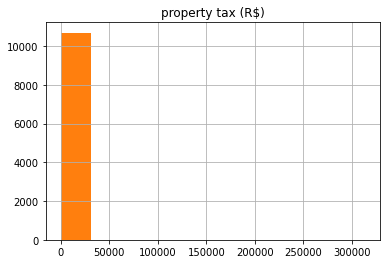

In [ ]:
df.hist('property tax (R$)')
plt.hist(df["property tax (R$)"])

In [ ]:
# Reemplazo de datos - por 0 de la columna floor
# cambiamos el tipo de dato de objeto a entero
#Se determina que los valores superiores al edificio mas alto del mundo se eliminan
df2 = df
df2['floor'] = df2['floor'].replace(['-'], '0')
df2['floor'] = df2['floor'].astype(int)


In [ ]:
#Eliminar datos outliers

#Se determina que los valores superiores al edificio mas alto del mundo se eliminan
df2.drop(df2.index[df2['floor'] > 186], inplace = True)
# Se eliminan los valores superiores a 745 (calculado bajo la regla de 1.5) de la columna property tax (R$)
df2.drop(df2.index[df2['property tax (R$)'] > 745], inplace = True)
#Deteccion outlier en fire insurance por lo tanto bajo la regla del 1.5 se eliminaran
df2.drop(df2.index[df2['fire insurance (R$)'] > 134], inplace = True)
#Deteccion outlier en area, se eliminan los valores bajo la regla del 1.5
df2.drop(df2.index[df2['area'] > 300], inplace = True)
#Deteccion outlier en bathroom, se eliminan los valores bajo la regla del 1.5
df2.drop(df2.index[df2['bathroom'] > 5], inplace = True)
#Deteccion outlier en rooms, se eliminan los valores bajo la regla del 1.5
df2.drop(df2.index[df2['rooms'] > 6], inplace = True)
#Deteccion outlier en ROA, se eliminan los valores bajo la regla del 1.5
df2.drop(df2.index[df2['hoa (R$)'] > 2075], inplace = True)
#Deteccion outlier en total, se eliminan los valores bajo la regla del 1.5
df2.drop(df2.index[df2['total (R$)'] > 6000], inplace = True)
#Deteccion outlier en parking spaces
df2.drop(df2.index[df2['parking spaces'] > 4], inplace = True)

In [ ]:
df2.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000
mean,82.426232,2.067162,1.594688,0.972887,4.722543,522.805257,2117.084503,108.786265,28.873383,2777.726535
std,51.922881,0.916712,0.813458,0.932672,4.917022,440.214351,1046.876555,120.694959,14.897029,1314.560987
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,48.000000,1.000000,1.000000,0.000000,1.000000,200.000000,1275.000000,19.000000,17.000000,1710.000000
50%,70.000000,2.000000,1.000000,1.000000,3.000000,454.000000,1900.000000,73.000000,26.000000,2552.000000
75%,100.000000,3.000000,2.000000,1.000000,7.000000,750.000000,2800.000000,153.000000,38.000000,3707.000000
max,300.000000,6.000000,6.000000,5.000000,51.000000,2065.000000,5900.000000,741.000000,98.000000,6000.000000


(array([3.106e+03, 1.735e+03, 7.120e+02, 7.750e+02, 3.660e+02, 2.860e+02,
        1.100e+02, 8.200e+01, 2.500e+01, 4.500e+01, 1.900e+01, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.  ,  2.55,  5.1 ,  7.65, 10.2 , 12.75, 15.3 , 17.85, 20.4 ,
        22.95, 25.5 , 28.05, 30.6 , 33.15, 35.7 , 38.25, 40.8 , 43.35,
        45.9 , 48.45, 51.  ]),
 <a list of 20 Patch objects>)

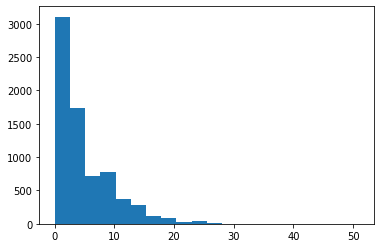

In [ ]:
plt.hist(df2["floor"], bins=20)


(array([2411., 1251., 1048.,  637.,  462.,  351.,  321.,  189.,  150.,
         123.,   85.,   66.,   37.,   45.,   21.,   15.,   17.,   11.,
          12.,   11.]),
 array([  0.  ,  37.05,  74.1 , 111.15, 148.2 , 185.25, 222.3 , 259.35,
        296.4 , 333.45, 370.5 , 407.55, 444.6 , 481.65, 518.7 , 555.75,
        592.8 , 629.85, 666.9 , 703.95, 741.  ]),
 <a list of 20 Patch objects>)

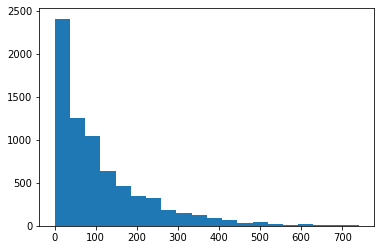

In [ ]:
plt.hist(df2["property tax (R$)"], bins=20,)

(array([2295.,    0.,    0.,    0., 2641.,    0.,    0.,    0., 1940.,
           0.,    0.,    0.,  337.,    0.,    0.,    0.,   38.,    0.,
           0.,   12.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
        3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  ]),
 <a list of 20 Patch objects>)

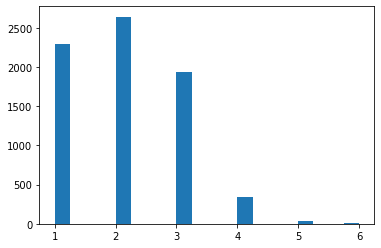

In [ ]:
plt.hist(df2["rooms"], bins=20,)

(array([4129.,    0.,    0.,    0.,    0., 2241.,    0.,    0.,    0.,
           0.,  661.,    0.,    0.,    0.,    0.,  185.,    0.,    0.,
           0.,   47.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 20 Patch objects>)

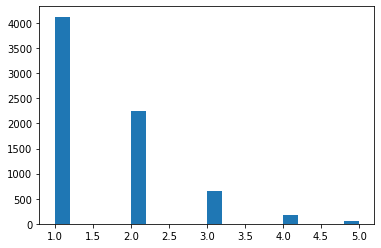

In [ ]:
plt.hist(df2["bathroom"], bins=20,)

(array([1901., 1427., 1428.,  991.,  595.,  348.,  242.,  175.,   98.,
          58.]),
 array([   0. ,  206.5,  413. ,  619.5,  826. , 1032.5, 1239. , 1445.5,
        1652. , 1858.5, 2065. ]),
 <a list of 10 Patch objects>)

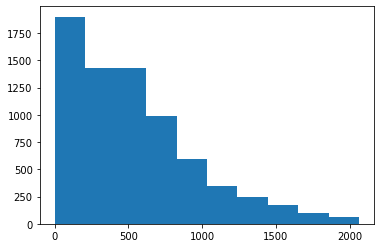

In [ ]:
plt.hist(df2["hoa (R$)"], bins=10,)

(array([ 402., 1171., 1281., 1102.,  880.,  720.,  611.,  467.,  381.,
         248.]),
 array([ 499. , 1049.1, 1599.2, 2149.3, 2699.4, 3249.5, 3799.6, 4349.7,
        4899.8, 5449.9, 6000. ]),
 <a list of 10 Patch objects>)

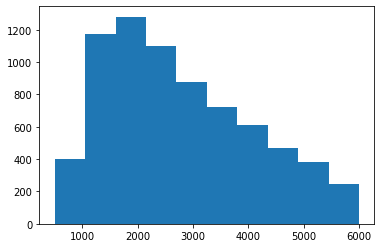

In [ ]:
plt.hist(df2["total (R$)"], bins=10,)

(array([1901., 1427., 1428.,  991.,  595.,  348.,  242.,  175.,   98.,
          58.]),
 array([   0. ,  206.5,  413. ,  619.5,  826. , 1032.5, 1239. , 1445.5,
        1652. , 1858.5, 2065. ]),
 <a list of 10 Patch objects>)

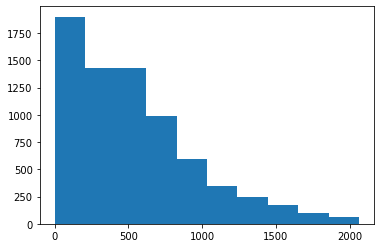

In [ ]:
plt.hist(df2["hoa (R$)"], bins=10,)

(array([2448.,    0.,    0.,    0.,    0., 3155.,    0.,    0.,    0.,
           0., 1262.,    0.,    0.,    0.,    0.,  250.,    0.,    0.,
           0.,  110.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 20 Patch objects>)

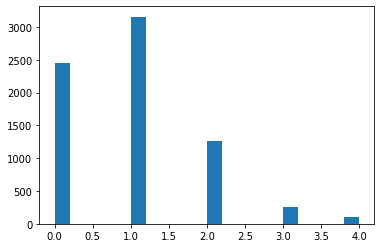

In [ ]:
plt.hist(df2["parking spaces"], bins=20,)

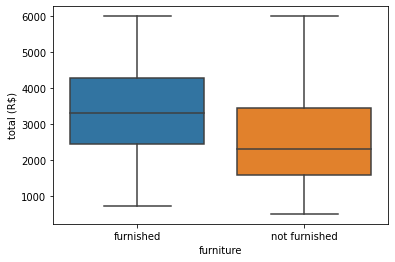

In [ ]:
sns.boxplot (x = 'furniture', y = 'total (R$)', data = df2)

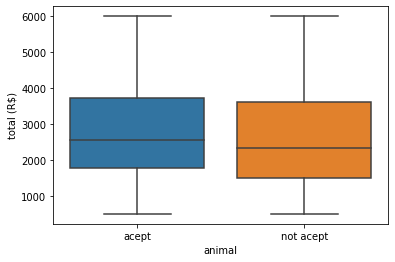

In [ ]:
sns.boxplot (x = 'animal', y = 'total (R$)', data = df2)

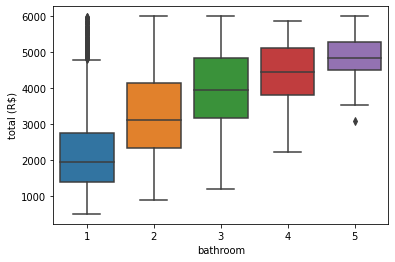

In [ ]:
#outliers en bathroom 1 y 5
sns.boxplot (x = 'bathroom', y = 'total (R$)', data = df2)

In [ ]:
df2.groupby('bathroom').describe()

area                                                            \
           count        mean        std    min    25%    50%    75%    max   
bathroom                                                                     
1         4128.0   56.302810  27.832522   11.0   40.0   50.0   68.0  300.0   
2         2226.0  100.159030  44.245046   30.0   70.0   89.0  116.0  300.0   
3          649.0  142.958398  54.203718   50.0  100.0  130.0  170.0  300.0   
4          177.0  182.762712  59.289545   71.0  136.0  180.0  230.0  300.0   
5           45.0  213.177778  63.374891  100.0  156.0  212.0  270.0  300.0   

           rooms                                              parking spaces  \
           count      mean       std  min  25%  50%  75%  max          count   
bathroom                                                                       
1         4128.0  1.572674  0.667389  1.0  1.0  1.0  2.0  5.0         4128.0   
2         2226.0  2.539982  0.722959  1.0  2.0  3.0  3.0  6.0         2226.0   
3          649.0  3.027735  0.719547  1.0  3.0  3.0  3.0  6.0          649.0   
4          177.0  3.338983  0.664271  1.0  3.0  3.0  4.0  6.0          177.0   
5           45.0  3.911111  0.848052  2.0  3.0  4.0  4.0  6.0           45.0   

                                                        floor            \
              mean       std  min  25%  50%  75%  max   count      mean   
bathroom                                                                  
1         0.562258  0.610068  0.0  0.0  1.0  1.0  4.0  4128.0  4.687742   
2         1.283019  0.824266  0.0  1.0  1.0  2.0  4.0  2226.0  5.188230   
3         1.796610  0.953512  0.0  1.0  2.0  2.0  4.0   649.0  4.135593   
4         2.305085  1.096289  0.0  2.0  2.0  3.0  4.0   177.0  3.271186   
5         2.622222  1.072145  0.0  2.0  3.0  3.0  4.0    45.0  2.733333   

                                             hoa (R$)                          \
               std  min  25%  50%  75%   max    count        mean         std   
bathroom                                                                        
1         4.896370  0.0  1.0  3.0  7.0  32.0   4128.0  420.057171  345.363491   
2         4.946733  0.0  1.0  4.0  8.0  51.0   2226.0  667.214735  460.523500   
3         4.793267  0.0  0.0  3.0  7.0  26.0    649.0  674.369800  584.789380   
4         4.944569  0.0  0.0  0.0  5.0  26.0    177.0  615.553672  671.128678   
5         4.329602  0.0  0.0  0.0  3.0  16.0     45.0  615.466667  730.719931   

                                             rent amount (R$)               \
          min    25%    50%      75%     max            count         mean   
bathroom                                                                     
1         0.0  185.0  392.5   594.25  2065.0           4128.0  1703.573159   
2         0.0  350.0  657.0   954.75  2064.0           2226.0  2447.205301   
3         0.0    0.0  700.0  1150.00  2056.0            649.0  3034.482280   
4         0.0    0.0  250.0  1300.00  2000.0            177.0  3444.073446   
5         0.0    0.0    0.0  1300.00  1950.0             45.0  3858.600000   

                                                              \
                 std     min     25%     50%     75%     max   
bathroom                                                       
1         872.836027   450.0  1090.0  1500.0  2150.0  5900.0   
2         959.076326   650.0  1700.0  2300.0  3000.0  5590.0   
3         909.643481   950.0  2376.0  3000.0  3670.0  5500.0   
4         822.180395  1190.0  2950.0  3400.0  4000.0  5525.0   
5         921.630359   935.0  3468.0  3800.0  4500.0  5500.0   

         property tax (R$)                                                    \
                     count        mean         std  min    25%    50%    75%   
bathroom                                                                       
1                   4128.0   63.362161   77.114784  0.0    0.0   42.0   89.0   
2                   2226.0  143.402066

In [ ]:
#Eliminacion outliers bathroom
bathroom1 = df2[ (df2['bathroom'] == 1) & (df2['total (R$)'] > 4400) ].index
bathroom5 = df2[ (df2['bathroom'] == 5) & (df2['total (R$)'] < 3550) ].index
df2.drop(bathroom1 , inplace=True)
df2.drop(bathroom5 , inplace=True)

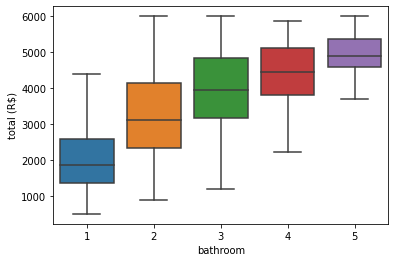

In [ ]:
#Variables sin outliers
sns.boxplot (x = 'bathroom', y = 'total (R$)', data = df2)

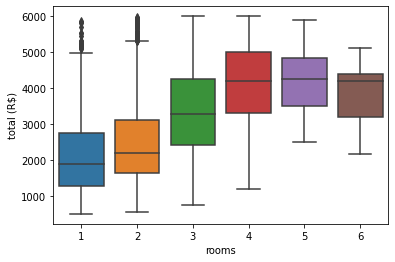

In [ ]:
#Outlier en rooms 1 y 2
sns.boxplot (x = 'rooms', y = 'total (R$)', data = df2)

In [ ]:
df2.groupby('rooms').describe()

area                                                            \
        count        mean        std    min    25%    50%    75%    max   
rooms                                                                     
1      2178.0   42.603765  19.029883   11.0   30.0   40.0   50.0  270.0   
2      2578.0   74.643910  30.645805   25.0   57.0   68.0   80.0  300.0   
3      1885.0  118.632891  48.187785   35.0   85.0  105.0  140.0  300.0   
4       325.0  175.381538  57.031416   70.0  135.0  160.0  212.0  300.0   
5        33.0  212.757576  60.146711   35.0  180.0  220.0  250.0  300.0   
6        11.0  202.363636  42.076770  132.0  180.0  198.0  215.0  293.0   

      bathroom                                              parking spaces  \
         count      mean       std  min  25%  50%  75%  max          count   
rooms                                                                        
1       2178.0  1.064279  0.259855  1.0  1.0  1.0  1.0  4.0         2178.0   
2       2578.0  1.463538  0.605585  1.0  1.0  1.0  2.0  5.0         2578.0   
3       1885.0  2.162334  0.802175  1.0  2.0  2.0  3.0  5.0         1885.0   
4        325.0  2.864615  0.962320  1.0  2.0  3.0  3.0  5.0          325.0   
5         33.0  3.303030  1.131505  1.0  3.0  3.0  4.0  5.0           33.0   
6         11.0  2.727273  1.009050  2.0  2.0  2.0  3.0  5.0           11.0   

                                                     floor            \
           mean       std  min  25%  50%  75%  max   count      mean   
rooms                                                                  
1      0.410468  0.558494  0.0  0.0  0.0  1.0  4.0  2178.0  5.115702   
2      0.877812  0.691573  0.0  0.0  1.0  1.0  4.0  2578.0  4.734290   
3      1.466313  0.935020  0.0  1.0  1.0  2.0  4.0  1885.0  4.387268   
4      2.040000  1.072208  0.0  1.0  2.0  3.0  4.0   325.0  3.132308   
5      2.181818  1.285850  0.0  2.0  2.0  3.0  4.0    33.0  0.939394   
6      2.090909  1.044466  0.0  2.0  2.0  2.5  4.0    11.0  2.090909   

                                          hoa (R$)                          \
            std  min  25%  50%  75%   max    count        mean         std   
rooms                                                                        
1      5.383452  0.0  1.0  3.0  8.0  32.0   2178.0  393.272727  333.031741   
2      4.696410  0.0  1.0  3.0  7.0  51.0   2578.0  494.707525  364.536671   
3      4.506382  0.0  1.0  3.0  7.0  25.0   1885.0  662.955438  517.707347   
4      4.095055  0.0  0.0  2.0  5.0  26.0    325.0  627.273846  624.010468   
5      2.737921  0.0  0.0  0.0  0.0  15.0     33.0  180.545455  421.184497   
6      5.337688  0.0  0.0  0.0  1.5  18.0     11.0  145.454545  323.615934   

                                         rent amount (R$)               \
       min    25%    50%     75%     max            count         mean   
rooms                                                                    
1      0.0  143.0  377.5   560.0  2000.0           2178.0  1648.785124   
2      0.0  250.0  460.0   700.0  2000.0           2578.0  1889.138092   
3      0.0  223.0  637.0  1018.0  2056.0           1885.0  2512.915119   
4      0.0    0.0  568.0  1100.0  2064.0            325.0  3210.513846   
5      0.0    0.0    0.0     0.0  1500.0             33.0  3737.818182   
6      0.0    0.0    0.0     0.0   800.0             11.0  3470.181818   

                                                          property tax (R$)  \
              std     min     25%     50%     75%     max             count   
rooms                                                                         
1      815.103981   450.0  1000.0  1490.0  2199.5  4800.0            2178.0   
2      902.034093   500.0  1200.0  1650.0  2400.0  5590.0            2578.0   
3      983.892883   650.0  1700.0  2430.0  3200.0  5550.0            1885.0   
4      910.790887   950.0  2500.0  3250.0  3800.0  5525.0             325.0   
5      867.535210  2200.0  3000.0  3999.0  4500.0  5200.0 

In [ ]:
#Eliminacion outliers rooms
room1 = df2[ (df2['rooms'] == 1) & (df2['total (R$)'] > 4900) ].index
room5 = df2[ (df2['rooms'] == 2) & (df2['total (R$)'] > 5000) ].index
df2.drop(room1 , inplace=True)
df2.drop(room5 , inplace=True)

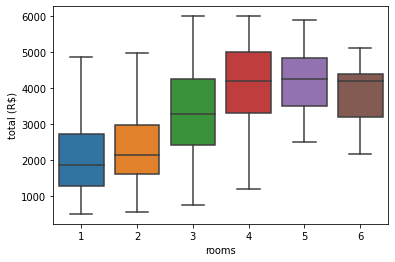

In [ ]:
#Outlier en rooms 1 y 2
sns.boxplot (x = 'rooms', y = 'total (R$)', data = df2)

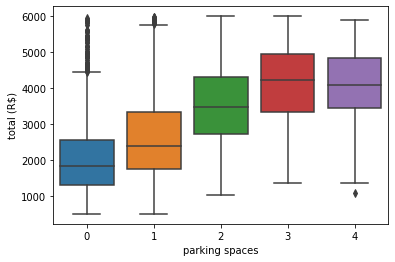

In [ ]:
#Outliers en parking spaces 0 y, 1 y 4
sns.boxplot (x = 'parking spaces', y = 'total (R$)', data = df2)

In [ ]:
df2.groupby('parking spaces').describe()

area                                                    \
                 count        mean        std   min    25%    50%    75%   
parking spaces                                                             
0               2381.0   59.687946  37.993394  11.0   35.0   50.0   72.0   
1               2943.0   73.162080  36.841152  18.0   50.0   65.0   85.0   
2               1195.0  118.410879  51.653377  25.0   80.0  105.0  143.5   
3                240.0  169.237500  60.432592  60.0  123.0  150.5  210.0   
4                108.0  196.638889  59.720761  70.0  157.5  200.0  250.0   

                        rooms                                               \
                  max   count      mean       std  min  25%  50%  75%  max   
parking spaces                                                               
0               300.0  2381.0  1.580428  0.761425  1.0  1.0  1.0  2.0  6.0   
1               300.0  2943.0  2.031940  0.772795  1.0  1.0  2.0  3.0  6.0   
2               300.0  1195.0  2.820921  0.758910  1.0  2.0  3.0  3.0  6.0   
3               300.0   240.0  3.262500  0.704031  1.0  3.0  3.0  4.0  6.0   
4               300.0   108.0  3.314815  0.838870  1.0  3.0  3.0  4.0  6.0   

               bathroom                                                floor  \
                  count      mean       std  min  25%  50%  75%  max   count   
parking spaces                                                                 
0                2381.0  1.215456  0.521984  1.0  1.0  1.0  1.0  5.0  2381.0   
1                2943.0  1.450900  0.615530  1.0  1.0  1.0  2.0  4.0  2943.0   
2                1195.0  2.316318  0.802233  1.0  2.0  2.0  3.0  5.0  1195.0   
3                 240.0  2.783333  0.995247  1.0  2.0  3.0  3.0  5.0   240.0   
4                 108.0  3.009259  1.123208  1.0  2.0  3.0  4.0  5.0   108.0   

                                                             hoa (R$)  \
                    mean       std  min  25%  50%  75%   max    count   
parking spaces                                                          
0               3.853423  4.564194  0.0  1.0  2.0  5.0  32.0   2381.0   
1               5.364594  4.803048  0.0  2.0  4.0  8.0  27.0   2943.0   
2               4.707113  5.076590  0.0  0.5  3.0  7.0  51.0   1195.0   
3               3.637500  4.895332  0.0  0.0  1.0  6.0  23.0    240.0   
4               1.407407  3.943614  0.0  0.0  0.0  0.0  26.0    108.0   

                                                                            \
                      mean         std  min    25%    50%      75%     max   
parking spaces                                                               
0               350.429231  330.848958  0.0    0.0  320.0   515.00  2064.0   
1               565.247367  384.298204  0.0  312.5  500.0   750.00  2000.0   
2               643.425941  504.603681  0.0  170.0  640.0  1000.00  2019.0   
3               616.600000  652.366877  0.0    0.0  500.0  1157.75  2000.0   
4               233.990741  498.070942  0.0    0.0    0.0     1.00  1950.0   

               rent amount (R$)                                            \
                          count         mean         std     min      25%   
parking spaces                                                              
0                        2381.0  1613.229315  780.769322   450.0  1042.00   
1                        2943.0  1920.609922  861.418292   460.0  1210.00   
2                        1195.0  2658.625105  904.815244   780.0  2000.00   
3                         240.0  3210.895833  954.232269  1250.0  2500.00   
4                         108.0  3499.972222  866.677483  1000.0  2934.75   

                                       property tax (R$)              \
                   50%     75%     max             count        mean   
parking spaces                                                         
0               1450.0  2000.0  5550.0            2381.0   63.966401   
1               1750.0  2500

In [ ]:
#Eliminacion Parking spaces
space0 = df2[ (df2['parking spaces'] == 0) & (df2['total (R$)'] > 4400) ].index
space1 = df2[ (df2['parking spaces'] == 1) & (df2['total (R$)'] > 5700) ].index
space4 = df2[ (df2['parking spaces'] == 4) & (df2['total (R$)'] < 1100) ].index
df2.drop(space0 , inplace=True)
df2.drop(space1 , inplace=True)
df2.drop(space4 , inplace=True)

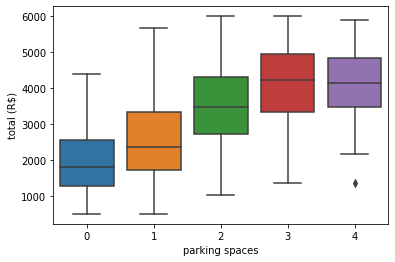

In [ ]:
#Outliers en parking spaces 0 y, 1 y 4
sns.boxplot (x = 'parking spaces', y = 'total (R$)', data = df2)

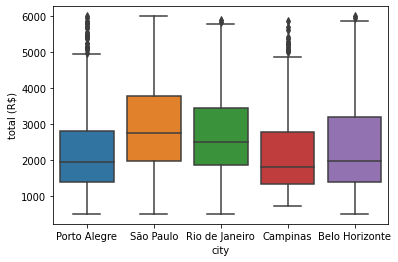

In [ ]:
#Outliers presentes en la ciudad de campinas y porto alegre
sns.boxplot (x = 'city', y = 'total (R$)', data = df2)

In [ ]:
df2.groupby('city').describe()

area                                                         \
                 count       mean        std   min    25%   50%    75%    max   
city                                                                            
Belo Horizonte   880.0  97.855682  59.417160  15.0  57.00  80.0  120.0  300.0   
Campinas         720.0  84.086111  49.738687  20.0  51.75  68.0   98.5  300.0   
Porto Alegre    1054.0  76.964896  46.850287  18.0  47.00  65.0   90.0  300.0   
Rio de Janeiro  1155.0  74.709957  40.838438  15.0  46.00  70.0   90.0  300.0   
São Paulo       3416.0  80.804450  52.071939  11.0  45.00  67.0  100.0  300.0   

                 rooms                                              bathroom  \
                 count      mean       std  min  25%  50%  75%  max    count   
city                                                                           
Belo Horizonte   880.0  2.537500  0.984962  1.0  2.0  3.0  3.0  6.0    880.0   
Campinas         720.0  2.120833  0.925972  1.0  1.0  2.0  3.0  6.0    720.0   
Porto Alegre    1054.0  1.948767  0.874474  1.0  1.0  2.0  3.0  6.0   1054.0   
Rio de Janeiro  1155.0  1.965368  0.843270  1.0  1.0  2.0  3.0  6.0   1155.0   
São Paulo       3416.0  1.988876  0.881164  1.0  1.0  2.0  3.0  6.0   3416.0   

                                                            parking spaces  \
                    mean       std  min  25%  50%  75%  max          count   
city                                                                         
Belo Horizonte  1.767045  0.850112  1.0  1.0  2.0  2.0  5.0          880.0   
Campinas        1.554167  0.820366  1.0  1.0  1.0  2.0  5.0          720.0   
Porto Alegre    1.493359  0.709087  1.0  1.0  1.0  2.0  5.0         1054.0   
Rio de Janeiro  1.462338  0.638938  1.0  1.0  1.0  2.0  4.0         1155.0   
São Paulo       1.616803  0.851043  1.0  1.0  1.0  2.0  5.0         3416.0   

                                                              floor            \
                    mean       std  min  25%  50%  75%  max   count      mean   
city                                                                            
Belo Horizonte  1.293182  0.918994  0.0  1.0  1.0  2.0  4.0   880.0  3.360227   
Campinas        1.136111  0.867158  0.0  1.0  1.0  2.0  4.0   720.0  4.494444   
Porto Alegre    0.800759  0.804876  0.0  0.0  1.0  1.0  4.0  1054.0  4.093928   
Rio de Janeiro  0.520346  0.632916  0.0  0.0  0.0  1.0  4.0  1155.0  5.196537   
São Paulo       1.015222  0.917570  0.0  0.0  1.0  2.0  4.0  3416.0  5.203747   

                                                   hoa (R$)              \
                     std  min  25%  50%  75%   max    count        mean   
city                                                                      
Belo Horizonte  3.396245  0.0  1.0  2.0  4.0  20.0    880.0  376.989773   
Campinas        4.595453  0.0  1.0  3.0  7.0  51.0    720.0  516.002778   
Porto Alegre    3.877725  0.0  2.0  3.0  6.0  23.0   1054.0  410.989564   
Rio de Janeiro  4.030472  0.0  2.0  4.0  8.0  25.0   1155.0  719.867532   
São Paulo       5.717257  0.0  0.0  3.0  8.0  32.0   3416.0  534.434426   

                                                             rent amount (R$)  \
                       std  min    25%    50%    75%     max            count   
city                                                                            
Belo Horizonte  360.934082  0.0  118.5  300.0  550.0  2000.0            880.0   
Campinas        365.566655  0.0  300.0  473.0  700.0  1950.0            720.0   
Porto Alegre    310.023494  0.0  240.0  350.0  500.0  2000.0           1054.0   
Rio de Janeiro  434.387745  0.0  450.0  662.0  968.5  2000.0           1155.0   
São Paulo       480.522026  0.0    0.0  487.0  800.0  2065.0           3416.0   

                                                                         \
                       mean          std    min     25%     50%     75%   
city                                                  

In [ ]:
#Eliminacion outliers en ciudad
ciudadP = df2[ (df2['city'] == 'Porto Alegre') & (df2['total (R$)'] > 4800) ].index
ciudadC = df2[ (df2['city'] == 'Campinas') & (df2['total (R$)'] > 4550) ].index
ciudadJ = df2[ (df2['city'] == 'Rio de Janeiro') & (df2['total (R$)'] > 5800) ].index
ciudadB = df2[ (df2['city'] == 'Belo Horizonte') & (df2['total (R$)'] > 5700) ].index
df2.drop(ciudadP , inplace=True)
df2.drop(ciudadC , inplace=True)
df2.drop(ciudadJ , inplace=True)
df2.drop(ciudadB , inplace=True)

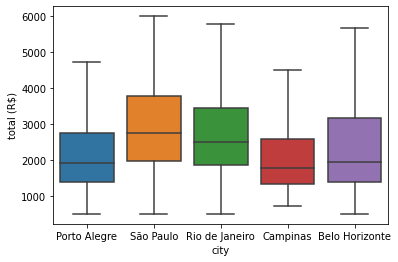

In [ ]:
#Variables sin outliers
sns.boxplot (x = 'city', y = 'total (R$)', data = df2)

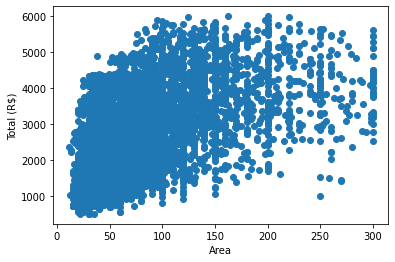

In [ ]:
plt.scatter(cdf.area,cdf.TOTAL)
plt.xlabel("Area")
plt.ylabel("Total (R$)")
plt.show()

In [ ]:
area1 = df2[ (df2['area'] >= 200) & (df2['total (R$)'] < 2000) ].index
area2 = df2[ (df2['area'] >= 150) & (df2['total (R$)'] < 1200) ].index
df2.drop(area1 , inplace=True)
df2.drop(area2 , inplace=True)

In [ ]:
#Binarizacion de datos animal y furniture
df2["animal"] = df2.apply(
    lambda x:
        1 if ((x["animal"] == "acept")) else 0,
        axis = 1
)
df2["furniture"] = df2.apply(
    lambda x:
        1 if ((x["furniture"] == "furnished")) else 0,
        axis = 1
)
city_typesbin = pd.get_dummies(df2["city"])

In [ ]:
#Concatenacion de filas binarizadas en df3
df3 = df2
df3 = pd.concat ([df3,city_typesbin],axis = 1)

In [ ]:
#Despues de la limpieza de los datos, quedamos con un 67% de los datos aproximadamente
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6694 entries, 2 to 10691
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 6694 non-null   object
 1   area                 6694 non-null   int64 
 2   rooms                6694 non-null   int64 
 3   bathroom             6694 non-null   int64 
 4   parking spaces       6694 non-null   int64 
 5   floor                6694 non-null   int64 
 6   animal               6694 non-null   int64 
 7   furniture            6694 non-null   int64 
 8   hoa (R$)             6694 non-null   int64 
 9   rent amount (R$)     6694 non-null   int64 
 10  property tax (R$)    6694 non-null   int64 
 11  fire insurance (R$)  6694 non-null   int64 
 12  total (R$)           6694 non-null   int64 
 13  Belo Horizonte       6694 non-null   uint8 
 14  Campinas             6694 non-null   uint8 
 15  Porto Alegre         6694 non-null   uint8 
 16  Rio d

In [ ]:
sdf = df3[["area","rooms","bathroom","parking spaces","furniture","animal","total (R$)"]]
sdf.rename(columns = {'total (R$)':'TOTAL'}, inplace = True)
sdf.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,area,rooms,bathroom,parking spaces,furniture,animal,TOTAL
2,80,1,1,1,0,1,3841
3,51,2,1,0,0,1,1421
4,25,1,1,0,0,0,836
6,72,2,1,0,0,1,2750
9,35,1,1,0,1,1,2955


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


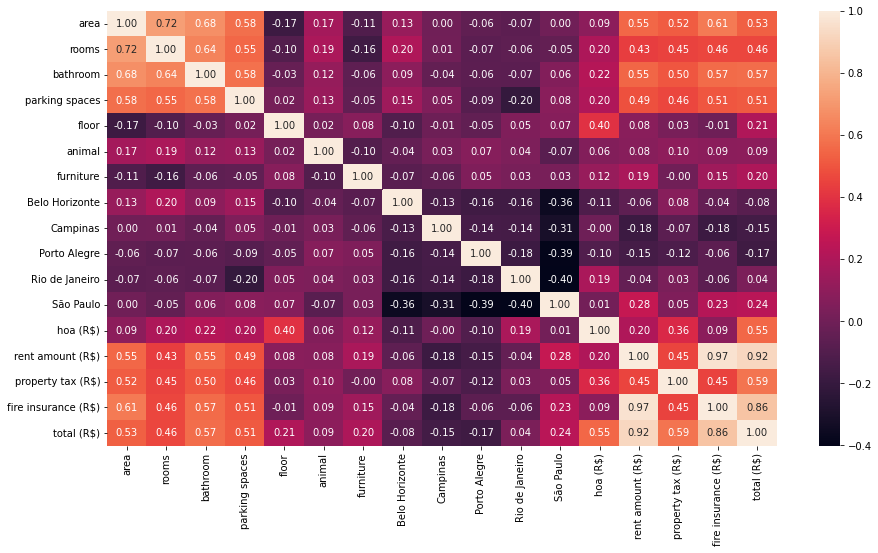

In [ ]:
cdf = df3 [["area","rooms","bathroom","parking spaces","floor","animal","furniture","Belo Horizonte","Campinas","Porto Alegre","Rio de Janeiro","São Paulo","hoa (R$)",	"rent amount (R$)",	"property tax (R$)",	"fire insurance (R$)" ,"total (R$)"]]
plt.figure(figsize = (15,8))
sns.heatmap(cdf.corr(),annot=True, fmt="0.2f")
#cambio de nombre columna total
cdf.rename(columns = {'total (R$)':'TOTAL'}, inplace = True)

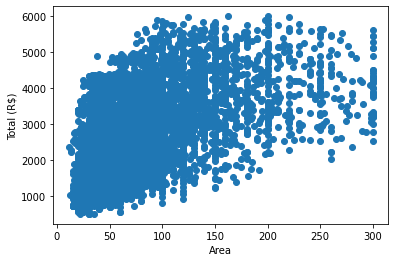

In [ ]:
plt.scatter(cdf.area,cdf.TOTAL)
plt.xlabel("Area")
plt.ylabel("Total (R$)")
plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


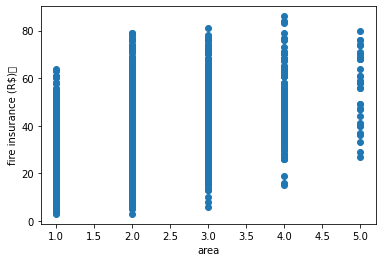

In [ ]:
plt.scatter(cdf.bathroom,cdf.TOTAL)
plt.xlabel("area")
plt.ylabel("fire insurance (R$)	")
plt.show()

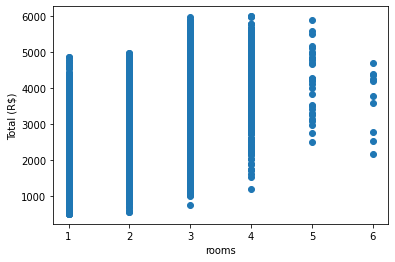

In [ ]:
plt.scatter(cdf.rooms,cdf.TOTAL)
plt.xlabel("rooms")
plt.ylabel("Total (R$)")
plt.show()


In [ ]:
#Modelo entrenado para el total de datos
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
X = cdf[["area","rooms","bathroom","parking spaces","furniture","animal"]]
y = cdf[["TOTAL"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1, random_state = 0)
regr = linear_model.LinearRegression()
regr.fit(X_train , y_train)
#regr.fit(train_x,train_y)
print("Coeficiente:",regr.coef_)
print("Intercepto:",regr.intercept_)

Coeficiente: [[  4.52184901  74.54320682 436.5875601  274.58815271 754.87862285
   23.40919073]]
Intercepto: [968.25933452]


In [ ]:
y_pred_train = regr.predict(X_train)

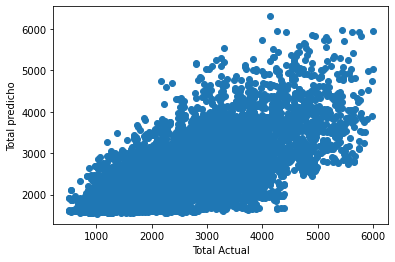

In [ ]:
plt.scatter(y_train,y_pred_train)

plt.xlabel("Total Actual")
plt.ylabel("Total predicho")
plt.show()

In [ ]:
from sklearn.metrics import r2_score

#regr=linear_model.LinearRegression()

print("R2-Score:", r2_score(y_train,y_pred_train))

R2-Score: 0.45812263256747854


In [ ]:
#Modelo entrenado filtrado por ciudad São Paulo
XS = cdf[["São Paulo","area","rooms","bathroom","parking spaces","furniture","animal"]]
yS = cdf[["TOTAL"]]
XS_train, XS_test, yS_train, yS_test = train_test_split(XS,yS,test_size = 1, random_state = 0)
regr = linear_model.LinearRegression()
regr.fit(XS_train , yS_train)
#regr.fit(train_x,train_y)
print("Coeficiente:",regr.coef_)
print("Intercepto:",regr.intercept_)

Coeficiente: [[473.36635144   4.59278298 115.6601149  403.77404336 242.05783161
  751.88047307  62.15205248]]
Intercepto: [711.32897774]


In [ ]:
yS_pred_train = regr.predict(XS_train)

In [ ]:
print("R2-Score:", r2_score(yS_train,yS_pred_train))

R2-Score: 0.4984430330818883


In [ ]:
#Modelo entrenado filtrado por ciudad Rio de Janeiro
XR = cdf[["Rio de Janeiro","area","rooms","bathroom","parking spaces","furniture","animal"]]
yR = cdf[["TOTAL"]]
XR_train, XR_test, yR_train, yR_test = train_test_split(XR,yR,test_size = 1, random_state = 0)
regr = linear_model.LinearRegression()
regr.fit(XR_train , yR_train)
#regr.fit(train_x,train_y)
print("Coeficiente:",regr.coef_)
print("Intercepto:",regr.intercept_)

Coeficiente: [[382.56385063   4.42330904  69.36245184 430.43734803 317.16466172
  743.91283698   1.82984021]]
Intercepto: [915.07312209]


In [ ]:
yR_pred_train = regr.predict(XR_train)

In [ ]:
print("R2-Score:", r2_score(yR_train,yR_pred_train))

R2-Score: 0.4717548665485858


In [ ]:
#Modelo entrenado filtrado por ciudad Porto Alegre
XP = cdf[["Porto Alegre","area","rooms","bathroom","parking spaces","furniture","animal"]]
yP = cdf[["TOTAL"]]
XP_train, XP_test, yP_train, yP_test = train_test_split(XP,yP,test_size = 1, random_state = 0)
regr = linear_model.LinearRegression()
regr.fit(XP_train , yP_train)
#regr.fit(train_x,train_y)
print("Coeficiente:",regr.coef_)
print("Intercepto:",regr.intercept_)

Coeficiente: [[-426.6828611     4.57381456   67.58216158  434.40120771  260.93650018
   775.09644749   56.96799947]]
Intercepto: [1029.40792898]


In [ ]:
yP_pred_train = regr.predict(XP_train)

In [ ]:
print("R2-Score:", r2_score(yP_train,yP_pred_train))

R2-Score: 0.47512334920132004


In [ ]:
#Modelo entrenado filtrado por ciudad Campinas
XC = cdf[["Campinas","area","rooms","bathroom","parking spaces","furniture","animal"]]
yC = cdf[["TOTAL"]]
XC_train, XC_test, yC_train, yC_test = train_test_split(XC,yC,test_size = 1, random_state = 0)
regr = linear_model.LinearRegression()
regr.fit(XC_train , yC_train)
#regr.fit(train_x,train_y)
print("Coeficiente:",regr.coef_)
print("Intercepto:",regr.intercept_)

Coeficiente: [[-541.14136426    4.53705721   75.24121815  412.18260994  294.93537243
   732.38229148   31.37216441]]
Intercepto: [1037.61975778]


In [ ]:
yC_pred_train = regr.predict(XC_train)

In [ ]:
print("R2-Score:", r2_score(yC_train,yC_pred_train))

R2-Score: 0.4776427318205656


In [ ]:
#Modelo entrenado filtrado por ciudad Campinas
XB = cdf[["Belo Horizonte","area","rooms","bathroom","parking spaces","furniture","animal"]]
yB = cdf[["TOTAL"]]
XB_train, XB_test, yB_train, yB_test = train_test_split(XB,yB,test_size = 1, random_state = 0)
regr = linear_model.LinearRegression()
regr.fit(XB_train , yB_train)
#regr.fit(train_x,train_y)
print("Coeficiente:",regr.coef_)
print("Intercepto:",regr.intercept_)

Coeficiente: [[-576.13127338    4.37342528  125.44031117  416.32346779  295.88519297
   731.36708752  -15.7259072 ]]
Intercepto: [995.17367695]


In [ ]:
yB_pred_train = regr.predict(XB_train)

In [ ]:
print("R2-Score:", r2_score(yB_train,yB_pred_train))

R2-Score: 0.48398855085396175
